In [35]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [36]:
data = fetch_california_housing()
print(data.DESCR)
columns = data.feature_names
data

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
df = pd.DataFrame(data.data,columns=columns)
df['target'] = data.target # Medhouseval 
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [39]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [40]:
# Now since the data is already imported from the scikitlearn class wwe do not need to perform precprocessing since the data is already preprocessed.

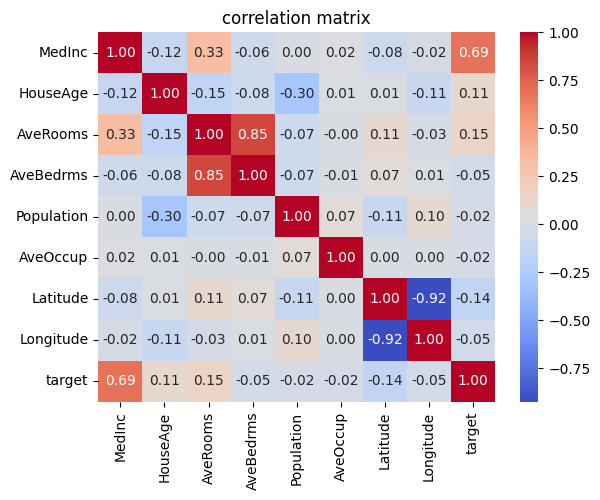

In [41]:
# lets check if the independent variables are correlated to each other or not, If the multicollinearity is close to -1 or 1, the variables might affect the model's performance later 

import seaborn as sns 
import matplotlib.pyplot as plt 

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

In [42]:
# since latitudes and longitudes are highly correlated will initially drop them and note the performance 
# Will also note the model's performance including these columns and compare both the results at the end 

In [44]:
df = df.drop(['Latitude','Longitude'],axis=1)

In [67]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


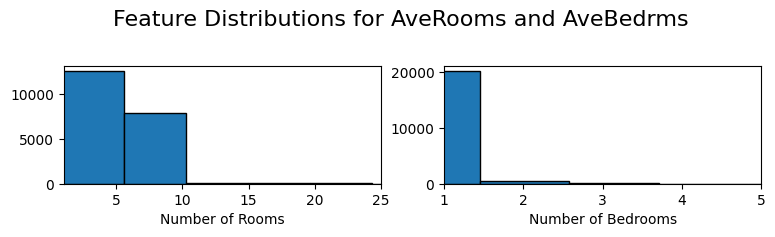

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(9, 2))
fig.suptitle("Feature Distributions for AveRooms and AveBedrms", fontsize=16)

# Histogram for AveRooms
axes[0].hist(df['AveRooms'], bins=30, edgecolor='black')
axes[0].set_xlabel("Number of Rooms")
axes[0].set_xlim(1, 25)  # Set x-axis range

# Histogram for AveBedrms
axes[1].hist(df['AveBedrms'], bins=30, edgecolor='black')
axes[1].set_xlabel("Number of Bedrooms")
axes[1].set_xlim(1, 5)  # Set x-axis range

plt.subplots_adjust(top=0.7)  # Adjust for title space
plt.show()


This charts shows following interpretations

Averms column is extremely rightly skewed starting from 1 to very less in number till 25.

Similarly Averms range from 1 to 4 with an extreme right skewness 

In general terms, skewed features may cause models to give undue weight to extreme values

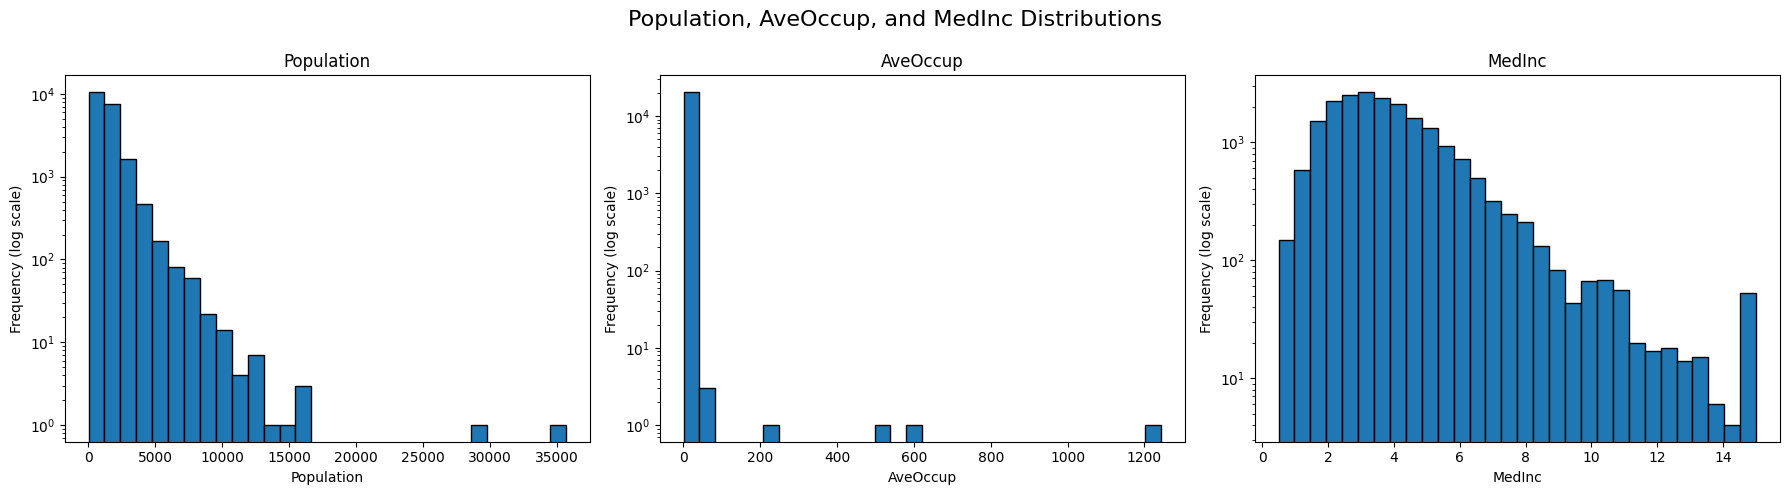

In [109]:
columns = ['Population', 'AveOccup', 'MedInc']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns for Population, AveOccup, and MedInc
fig.suptitle("Population, AveOccup, and MedInc Distributions", fontsize=16)

for ax, column in zip(axes, columns):
    ax.hist(df[column], bins=30, edgecolor='black', log=True)  # Log scale on y-axis
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency (log scale)")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust to make space for the main title
plt.show()


In [144]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1),df['target'],test_size=0.2,random_state=0)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 6)
(4128, 6)
(4128,)


In [146]:
# getting features to the same scale as we can see how features are ranging in different scales 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [147]:
ss.fit(X_train)

StandardScaler()

In [148]:
X_train_scaled = ss.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.190012,-1.795076,0.907714,0.149243,-1.047601,0.074082
1,0.269311,1.855539,-0.042002,0.009186,0.052109,0.045276
2,0.029895,-0.207852,-0.302824,-0.102099,-0.352955,-0.039332
3,-1.264470,0.744482,-0.812064,-0.176636,-0.591794,0.093990
4,-0.367016,1.855539,-0.520269,-0.107804,-0.254095,-0.164572
...,...,...,...,...,...,...
16507,0.281216,-0.684019,0.224858,-0.103189,-0.624165,0.034252
16508,-0.504949,-0.128491,-0.033022,-0.333310,-0.681031,0.010119
16509,-0.355897,0.188954,-0.709927,-0.316025,-0.631164,-0.192383
16510,0.920532,0.427037,-0.353503,-0.065518,-0.326709,-0.121509


In [149]:
X_test_scaled = ss.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [151]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [152]:
y_pred = lr.predict(X_test)

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)



0.5805583529898977
0.619278085417875
0.5250770679886747
